# Visualize movie data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
hollywood_movies = pd.read_csv("https://raw.githubusercontent.com/jgoodall/cinevis/master/data/csvs/moviedata.csv")
hollywood_movies.head(1)

,Year,exclude,Film,Lead Studio,Critic Rating,Audience Rating,Story,Genre,Opening Weekend Theaters,Opening Weekend per Cinema,Domestic Gross,Foreign Gross,Worldwide Gross,Budget,Profitability,Opening Weekend Revenue,Oscar
0,2011,NaN,Average,NaN,52.84,61.42,NaN,NaN,2810.31,8764.92,61.33,93.53,144.86,52.25,3.42,20.14,NaN


In [9]:
hollywood_movies.exclude.value_counts()
hollywood_movies = hollywood_movies.drop("exclude", axis=1)

** Generating scatter plots to understand relationship between profitability of movie and audience rating **

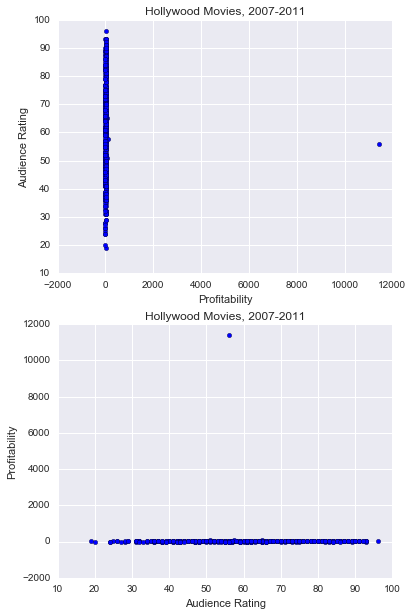

In [10]:
fig = plt.figure(figsize=(6,10))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(hollywood_movies['Profitability'], hollywood_movies["Audience Rating"])
ax1.set(xlabel="Profitability", ylabel="Audience Rating", title="Hollywood Movies, 2007-2011")

ax2.scatter(hollywood_movies["Audience Rating"], hollywood_movies['Profitability'])
ax2.set(xlabel="Audience Rating", ylabel="Profitability", title="Hollywood Movies, 2007-2011")

plt.show()

As we can see both the scatter plots are lopsided due to an outlier value, we'll filter this out.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116bbc198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11707f828>]], dtype=object)

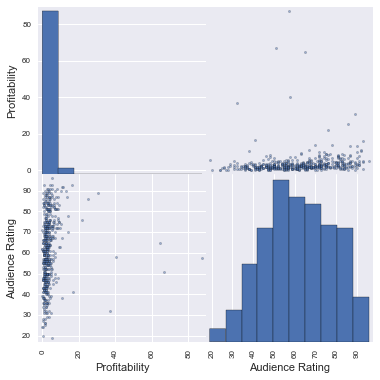

In [11]:
normal_movies = hollywood_movies[hollywood_movies.Film != "Paranormal Activity"]
pd.scatter_matrix(normal_movies[["Profitability", "Audience Rating"]], figsize=(6,6))

** Let's use box plot to understand the distributions of ratings by critics versus ratings by the audience. **

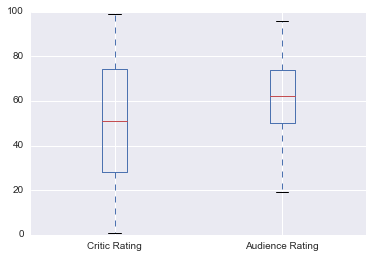

In [12]:
normal_movies[["Critic Rating", "Audience Rating"]].plot(kind="box")

** Let's visualize this data to see distribution change by year **

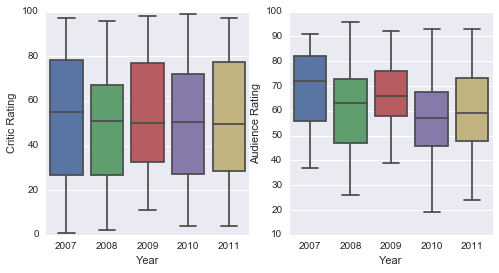

In [15]:
normal_movies.sort_values(by="Year")

fig3 = plt.figure(figsize=(8,4))
ax3 = fig3.add_subplot(1,2,1)
ax4 = fig3.add_subplot(1,2,2)

sns.boxplot(data=normal_movies[pd.notnull(normal_movies.Genre)], x="Year", y="Critic Rating", ax=ax3)
sns.boxplot(data=normal_movies[pd.notnull(normal_movies.Genre)], x="Year", y="Audience Rating", ax=ax4)

plt.show()

### Understanding movie profitability

** Let's create a new column 'Profitabile' based on Profitability column. **

/Users/aniruddhabarapatre1/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


True     447
False     69
Name: Profitable, dtype: int64


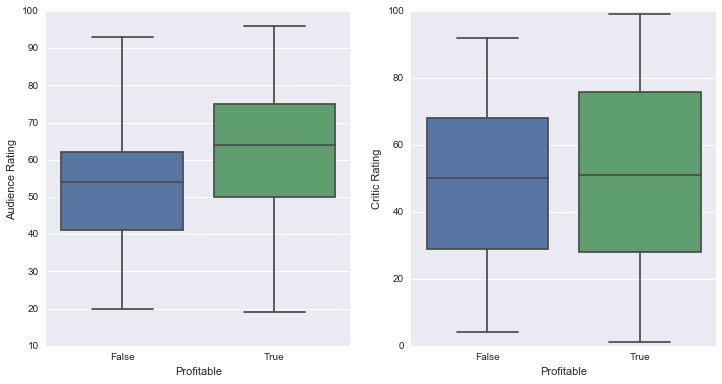

In [16]:
def is_profitable(row):
    if row["Profitability"] <= 1.0:
        return False
    return True
normal_movies["Profitable"] = normal_movies.apply(is_profitable, axis=1)
print(normal_movies["Profitable"].value_counts())

fig4 = plt.figure(figsize=(12,6))
ax5 = fig4.add_subplot(1,2,1)
ax6 = fig4.add_subplot(1,2,2)

sns.boxplot(data=normal_movies, x="Profitable", y="Audience Rating", ax=ax5)
sns.boxplot(data=normal_movies, x="Profitable", y="Critic Rating", ax=ax6)

plt.show()